### Lotka-Volterra predator prey sim

Predator prey models have the form:

$ \frac{dx}{dt} = \alpha x - \beta xy $

$ \frac{dy}{dt} = \delta xy - \gamma y $

Then we can represent this as a matrix:

$ \left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right]  \left[\begin{matrix} \frac{dx}{dt} \\ \frac{dy}{dt}  \end{matrix} \right] = \left[ \begin{matrix} \alpha x - \beta xy & 0 \\ 0 & \delta xy - \gamma y \end{matrix} \right] $

So given the initial condition (current population of animals):

$ p = \left[ \begin{matrix} x \\ y \end{matrix} \right] $

Then this is the format that the Octave function must take:

$ \left[ \begin{matrix} \alpha - \beta y & 0 \\ 0 & \delta x - \gamma \end{matrix} \right] \left[ \begin{matrix} x \\ y \end{matrix} \right]$

We do this so that the matrix order is the same, so that the function `Lotka_Volterra_Model` receives and returns a $2*1$ matrix.


In [1]:
close all;
clear all;

function dp = Lotka_Volterra_Model(t,p)
    alpha = 0.9; # Some made up parameters, 
    beta = 1;
    delta = 0.3;
    gamma = 0.2;
    A = [alpha - beta*p(2), 0; 0, delta*p(1) - gamma];
    dp = A*p; #same order matrix as function parameter p
end

t0 = 0;
tfinal = 80;
p0 = [8; 2]; # prey, predator initial conditions

[t,p] = ode45(@Lotka_Volterra_Model,[t0, tfinal],p0);

The following plot shows the prey (blue) line grows, so the predators (red) catch up, the prey population collapses, so does the predator population, and the cycle repeats.

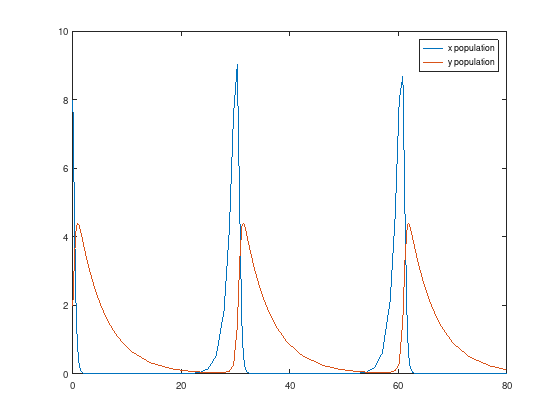

In [2]:
figure;

plot(t,p)
legend("x population", "y population")

The following plot shows how the populations interact. It's the same situation as the previous plot but it's a phase plane. It shows as the prey grows so do the predators. As the predators grow then the prey shrink.

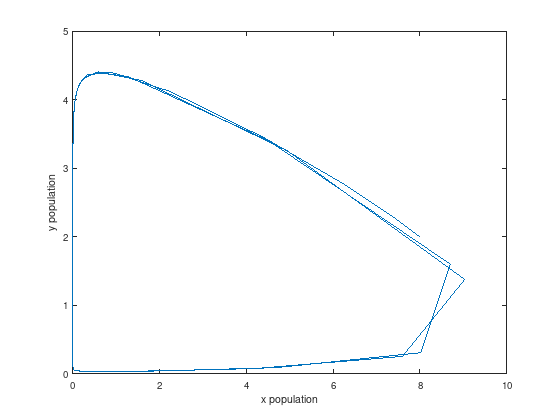

In [3]:
figure;

plot(p(:,1),p(:,2))
xlabel("x population");
ylabel("y population");